In [3]:
import sys
sys.path.append(r'C:\Users\Jack Halliday\Documents\MagPy')
from MagPy.Spectrometry import Bundle, Spectrum, Spectrometer
import matplotlib.pyplot as plt
import skimage.io as sk_i
from importlib import reload  
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
from scipy.ndimage import convolve1d
import plasmapy
#from Thomson import S_k_omega
%matplotlib notebook


In [2]:
sh = 's0903_20 TS shot.asc'
bk = 'bk.asc'


In [4]:
#reload(MagPy)
spect_sh = Spectrometer(sh)
spect_bk = Spectrometer(bk)
bundle = Bundle()
bundle.sp=17.9
bundle.off=7.7
bundle.dis=2
bundle.l0=531
bundle.l1=533
bundle.dl = 529.
bundle.split(spect_sh, spect_bk)
f11 = bundle.fibers['11A']

In [5]:
fig, ax = plt.subplots()
spect_bk.imshow(ax, cmap='Reds')

<IPython.core.display.Javascript object>

In [7]:
bundle.draw_split(spect_bk)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


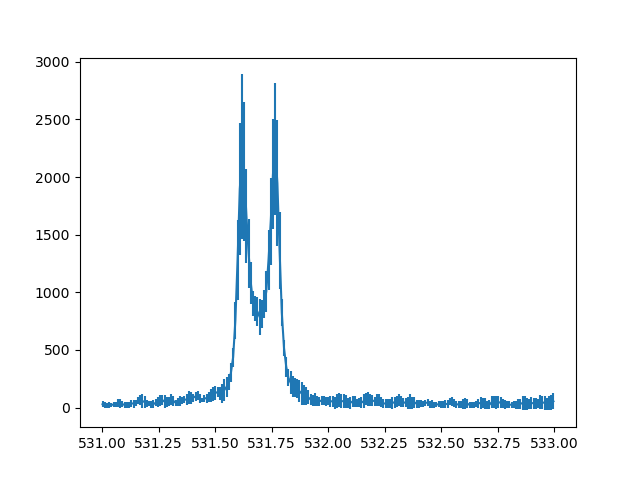

<ErrorbarContainer object of 3 artists>

In [26]:
s_w = np.sum(f11.s_im, 1) 
s_w1 = s_w/s_w.mean()
im_n = c = f11.s_im / s_w1[:, np.newaxis]
i = np.mean(im_n, axis=0)
s = np.std(im_n, axis=0)

fig, ax = plt.subplots()
ax.errorbar(x=f11.s_l, y=i, yerr=s)

<IPython.core.display.Javascript object>


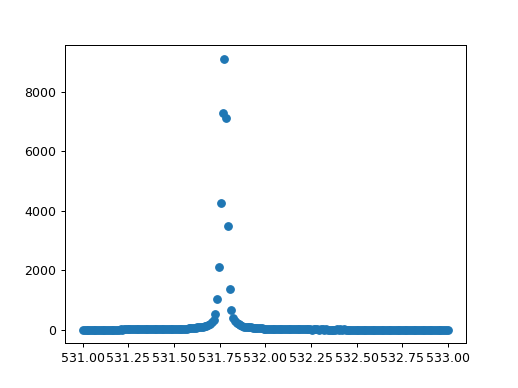

<IPython.core.display.Javascript object>


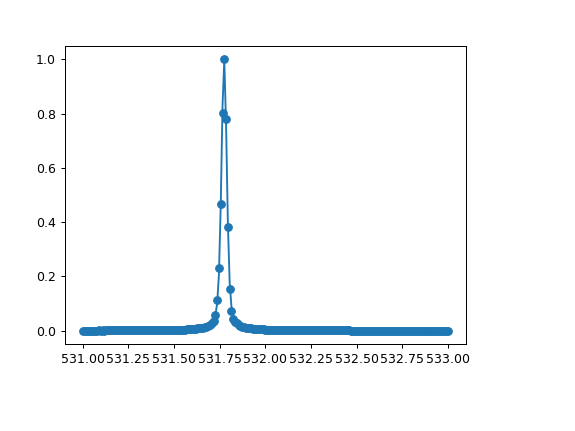

In [7]:
y_fit = f11.b_y
y_fit /= y_fit.max()
x_fit = f11.b_l
f11.fit_response()
y_fitted = f11.get_response(x_fit)
fig, ax = plt.subplots()
ax.scatter(x_fit, y_fit)
ax.plot(x_fit, y_fitted)



In [35]:
l0 = f1.get_probe_wavelength()*1e-9
S, alpha = S_k_omega(f7.l*1e-9, l0, 90., 14, 20, 15, 1e18, 6,  v_fi=0, v_fe=0)
kernal = f7.kernal
kernal /= kernal.max()
S_conv = convolve1d(S, kernal, mode='constant')
S_conv /= S_conv.max()

NameError: name 'f1' is not defined

<IPython.core.display.Javascript object>


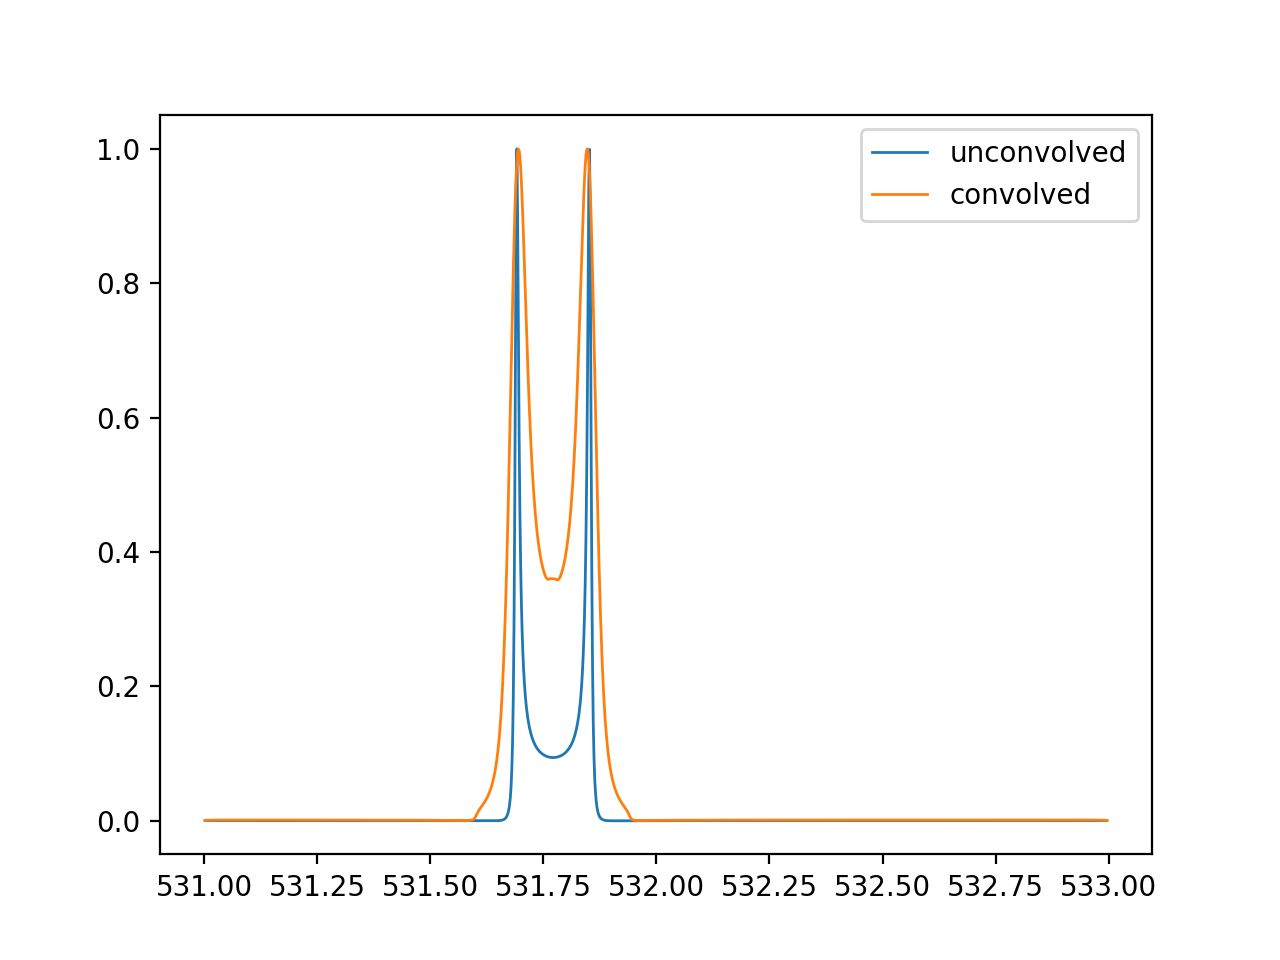

In [16]:
fig, ax = plt.subplots()
ax.plot(f7.l, S, label='unconvolved', lw=1)
#ax.plot(f7.kernal, label='response', marker='o')
ax.plot(f7.l, S_conv, label='convolved',lw=1)

ax.legend()